In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [2]:
file_path = '/content/credit card fraud.csv'
data = pd.read_csv(file_path)


In [3]:
data.dropna(inplace=True)

In [4]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [5]:
X = data.drop(['is_fraud'], axis=1)
y = data['is_fraud']

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [12]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)


In [13]:
print("Logistic Regression Model")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_log_reg))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_log_reg)}\n")


Logistic Regression Model
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    112298
         1.0       0.00      0.00      0.00       520

    accuracy                           0.99    112818
   macro avg       0.50      0.50      0.50    112818
weighted avg       0.99      0.99      0.99    112818

Confusion Matrix
[[112247     51]
 [   520      0]]
ROC AUC: 0.49977292560864844



In [14]:
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]
fpr_log_reg, tpr_log_reg, _log_reg = roc_curve(y_test, y_pred_proba_log_reg)


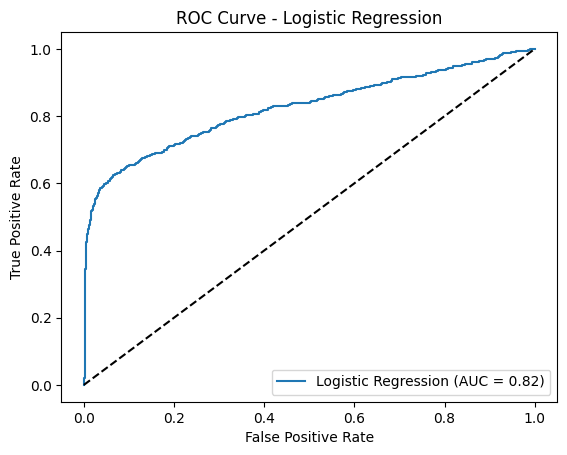

In [15]:

plt.figure()
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_proba_log_reg):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [16]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [17]:
print("Random Forest Model")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_rf))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_rf)}\n")

Random Forest Model
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    112298
         1.0       0.96      0.57      0.72       520

    accuracy                           1.00    112818
   macro avg       0.98      0.79      0.86    112818
weighted avg       1.00      1.00      1.00    112818

Confusion Matrix
[[112287     11]
 [   221    299]]
ROC AUC: 0.7874510231704928



In [18]:
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _rf = roc_curve(y_test, y_pred_proba_rf)


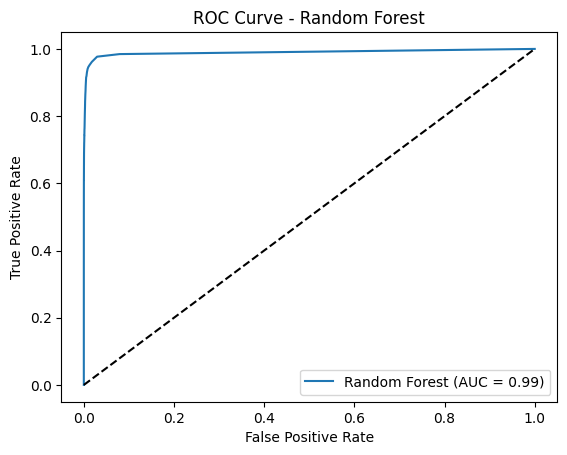

In [19]:
plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_pred_proba_rf):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

In [20]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)


In [21]:
print("Gradient Boosting Model")
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_gb))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_gb)}\n")

Gradient Boosting Model
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    112298
         1.0       0.72      0.49      0.59       520

    accuracy                           1.00    112818
   macro avg       0.86      0.75      0.79    112818
weighted avg       1.00      1.00      1.00    112818

Confusion Matrix
[[112200     98]
 [   263    257]]
ROC AUC: 0.7466790455888659



In [22]:
y_pred_proba_gb = gb.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, _gb = roc_curve(y_test, y_pred_proba_gb)

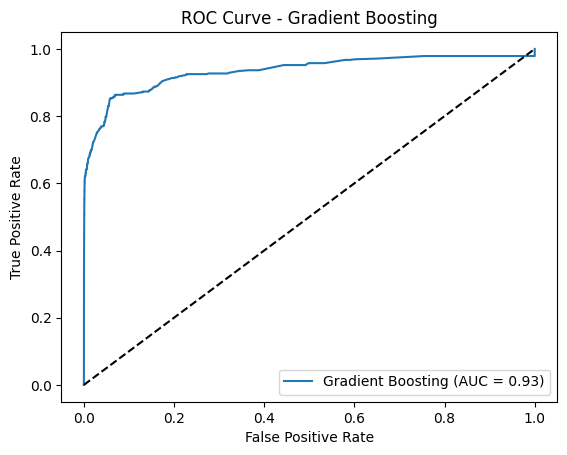

In [23]:
plt.figure()
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_score(y_test, y_pred_proba_gb):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc='lower right')
plt.show()